In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [7]:
data_dir = "../data/raw"

ltm_data = pd.read_excel(f"{data_dir}/LTM Data Aug 1 2022.xlsx")
epa_catalog = pd.read_excel(f"{data_dir}/Site Information.xlsx")
epa_lt_monitoring = pd.read_excel(f"{data_dir}/Methods.xlsx")

In [8]:
def analyze_data_quality(ltm_data, epa_catalog, epa_lt_monitoring):
    print("=== Data Quality Analysis ===")
    
    print("\nDataset dimensions:")
    print(f"LTM Data: {ltm_data.shape}")
    print(f"EPA Catalog: {epa_catalog.shape}")
    print(f"EPA Monitoring: {epa_lt_monitoring.shape}")
    
    print("\nMissing values in LTM Data:")
    missing_pct = (ltm_data.isnull().sum() / len(ltm_data) * 100).round(2)
    print(missing_pct[missing_pct > 0].sort_values(ascending=False))
    
    print("\nUnique values:")
    print(f"Number of unique sites: {ltm_data['SITE_ID'].nunique()}")
    print(f"Number of unique programs: {ltm_data['PROGRAM_ID'].nunique()}")
    print(f"Waterbody types: {ltm_data['WATERBODY_TYPE'].unique()}")

def temporal_analysis(ltm_data):
    ltm_data['DATE_SMP'] = pd.to_datetime(ltm_data['DATE_SMP'])
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
    
    samples_per_year = ltm_data.groupby(ltm_data['DATE_SMP'].dt.year).size()
    samples_per_year.plot(kind='bar', ax=ax1)
    ax1.set_title('Number of Samples per Year')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Number of Samples')
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
    
    annual_ph = ltm_data.groupby(ltm_data['DATE_SMP'].dt.year)['PH_LAB'].mean()
    annual_ph.plot(kind='line', marker='o', ax=ax2)
    ax2.set_title('Average pH Levels Over Time')
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Average pH')
    
    plt.tight_layout()
    plt.show()

def spatial_analysis(ltm_data, epa_catalog):
    merged_data = ltm_data.merge(epa_catalog[['SITE_ID', 'LATDD', 'LONDD', 'SITE_ELEV']], 
                                on='SITE_ID', how='left')
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
    
    merged_data['SITE_ELEV'].hist(bins=30, ax=ax1)
    ax1.set_title('Distribution of Sampling Sites by Elevation')
    ax1.set_xlabel('Elevation (m)')
    ax1.set_ylabel('Count')
    
    ax2.scatter(merged_data['SITE_ELEV'], merged_data['PH_LAB'], alpha=0.5)
    ax2.set_title('pH Levels vs Site Elevation')
    ax2.set_xlabel('Elevation (m)')
    ax2.set_ylabel('pH Level')
    
    plt.tight_layout()
    plt.show()

def chemical_analysis(ltm_data):
    chemical_cols = ['PH_LAB', 'SO4_UEQ_L', 'CA_UEQ_L', 'ANC_UEQ_L']
    chemical_data = ltm_data[chemical_cols].copy()
    
    fig, ax = plt.subplots(figsize=(10, 8))
    im = ax.imshow(chemical_data.corr(), cmap='coolwarm')
    
    corr = chemical_data.corr()
    for i in range(len(chemical_cols)):
        for j in range(len(chemical_cols)):
            text = ax.text(j, i, f'{corr.iloc[i, j]:.2f}',
                         ha="center", va="center", color="black")
    
    ax.set_xticks(np.arange(len(chemical_cols)))
    ax.set_yticks(np.arange(len(chemical_cols)))
    ax.set_xticklabels(chemical_cols)
    ax.set_yticklabels(chemical_cols)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    
    plt.title('Correlation Between Chemical Parameters')
    plt.colorbar(im)
    plt.tight_layout()
    plt.show()
    
    # Create distribution plots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    for idx, col in enumerate(chemical_cols):
        ax = axes[idx//2, idx%2]
        ltm_data[col].hist(bins=30, ax=ax)
        ax.set_title(f'Distribution of {col}')
    
    plt.tight_layout()
    plt.show()

def waterbody_analysis(ltm_data):
    chemical_cols = ['PH_LAB', 'SO4_UEQ_L', 'CA_UEQ_L', 'ANC_UEQ_L']
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    for idx, col in enumerate(chemical_cols):
        ax = axes[idx//2, idx%2]
        ltm_data.boxplot(column=col, by='WATERBODY_TYPE', ax=ax)
        ax.set_title(f'{col} by Waterbody Type')
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
    
    plt.tight_layout()
    plt.show()

def run_analysis(ltm_data, epa_catalog, epa_lt_monitoring):
    plt.style.use('seaborn')
    
    analyze_data_quality(ltm_data, epa_catalog, epa_lt_monitoring)
    temporal_analysis(ltm_data)
    spatial_analysis(ltm_data, epa_catalog)
    chemical_analysis(ltm_data)
    waterbody_analysis(ltm_data)


=== Data Quality Analysis ===

Dataset dimensions:
LTM Data: (38200, 30)
EPA Catalog: (175, 31)
EPA Monitoring: (362, 6)

Missing values in LTM Data:
N_TD_UEQ_L      97.50
SECCHI_M        96.86
PH_STVL         95.56
PH_FLD          90.41
CHL_A_UG_L      89.09
P_TL_UEQ_L      83.77
WTEMP_DEG_C     57.08
F_UEQ_L         54.57
TIME_SMP        53.70
SAMPLE_DEPTH    51.94
PH_EQ           50.47
DOC_MG_L        24.41
NH4_UEQ_L       23.32
PH_LAB          10.30
SIO2_MG_L        3.79
COND_UM_CM       2.11
NO3_UEQ_L        1.15
K_UEQ_L          0.78
CL_UEQ_L         0.75
NA_UEQ_L         0.74
SO4_UEQ_L        0.59
CA_UEQ_L         0.57
MG_UEQ_L         0.56
ANC_UEQ_L        0.31
dtype: float64

Unique values:
Number of unique sites: 169
Number of unique programs: 6
Waterbody types: ['Stream' 'Lake']


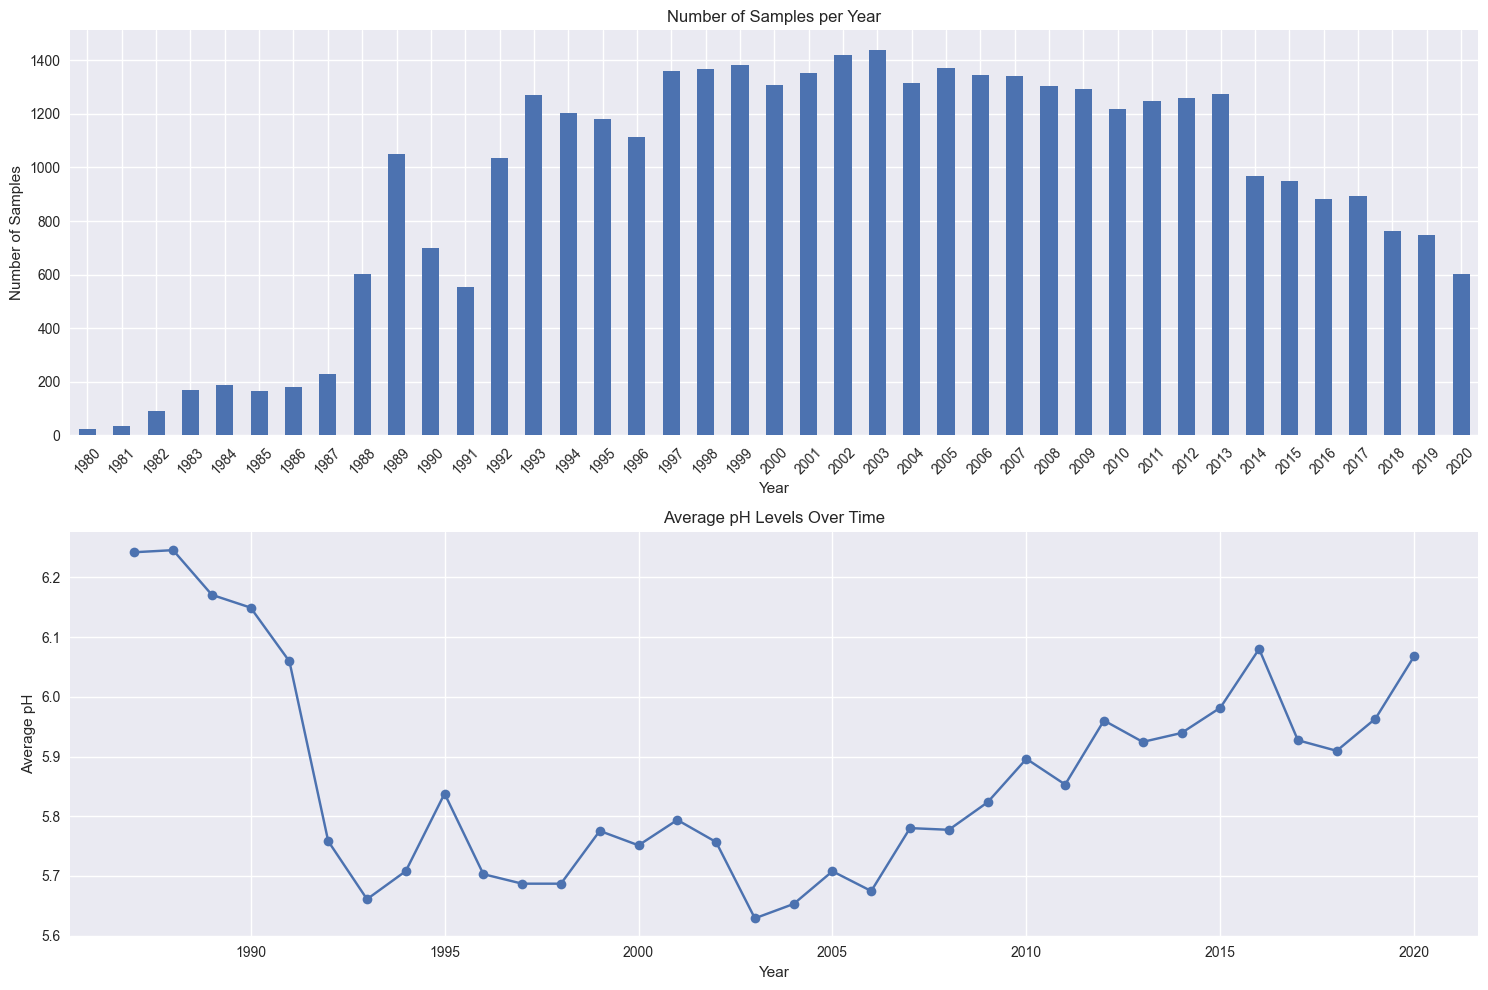

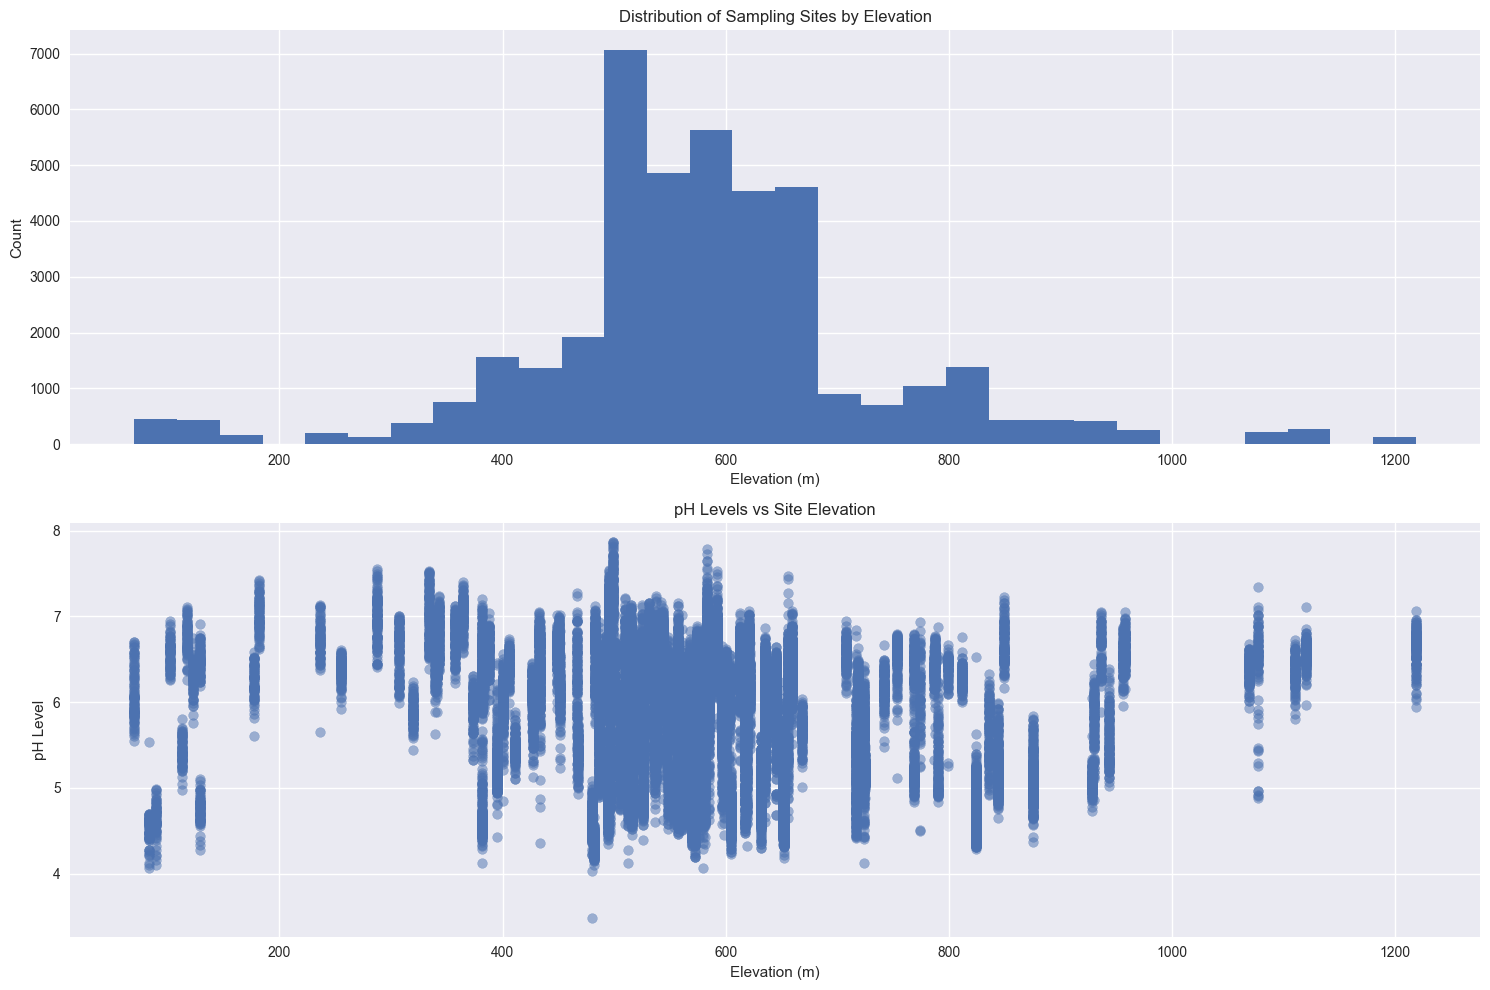

/var/folders/cs/10prq4xx2nz7f3t1h6__xdkr0000gn/T/ipykernel_50472/395932720.py:78: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(im)


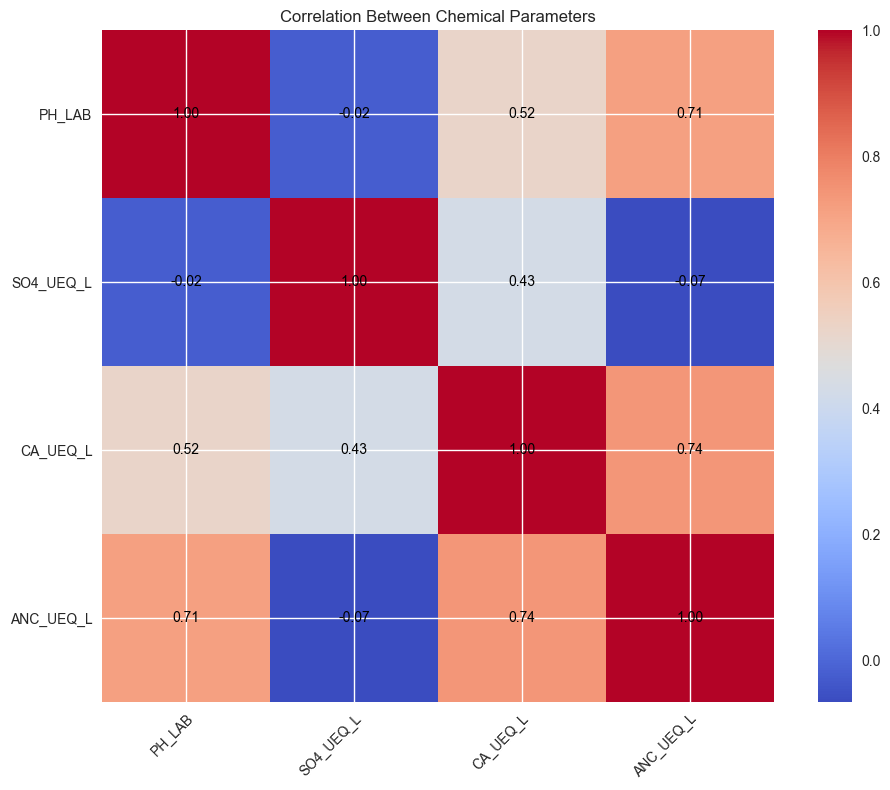

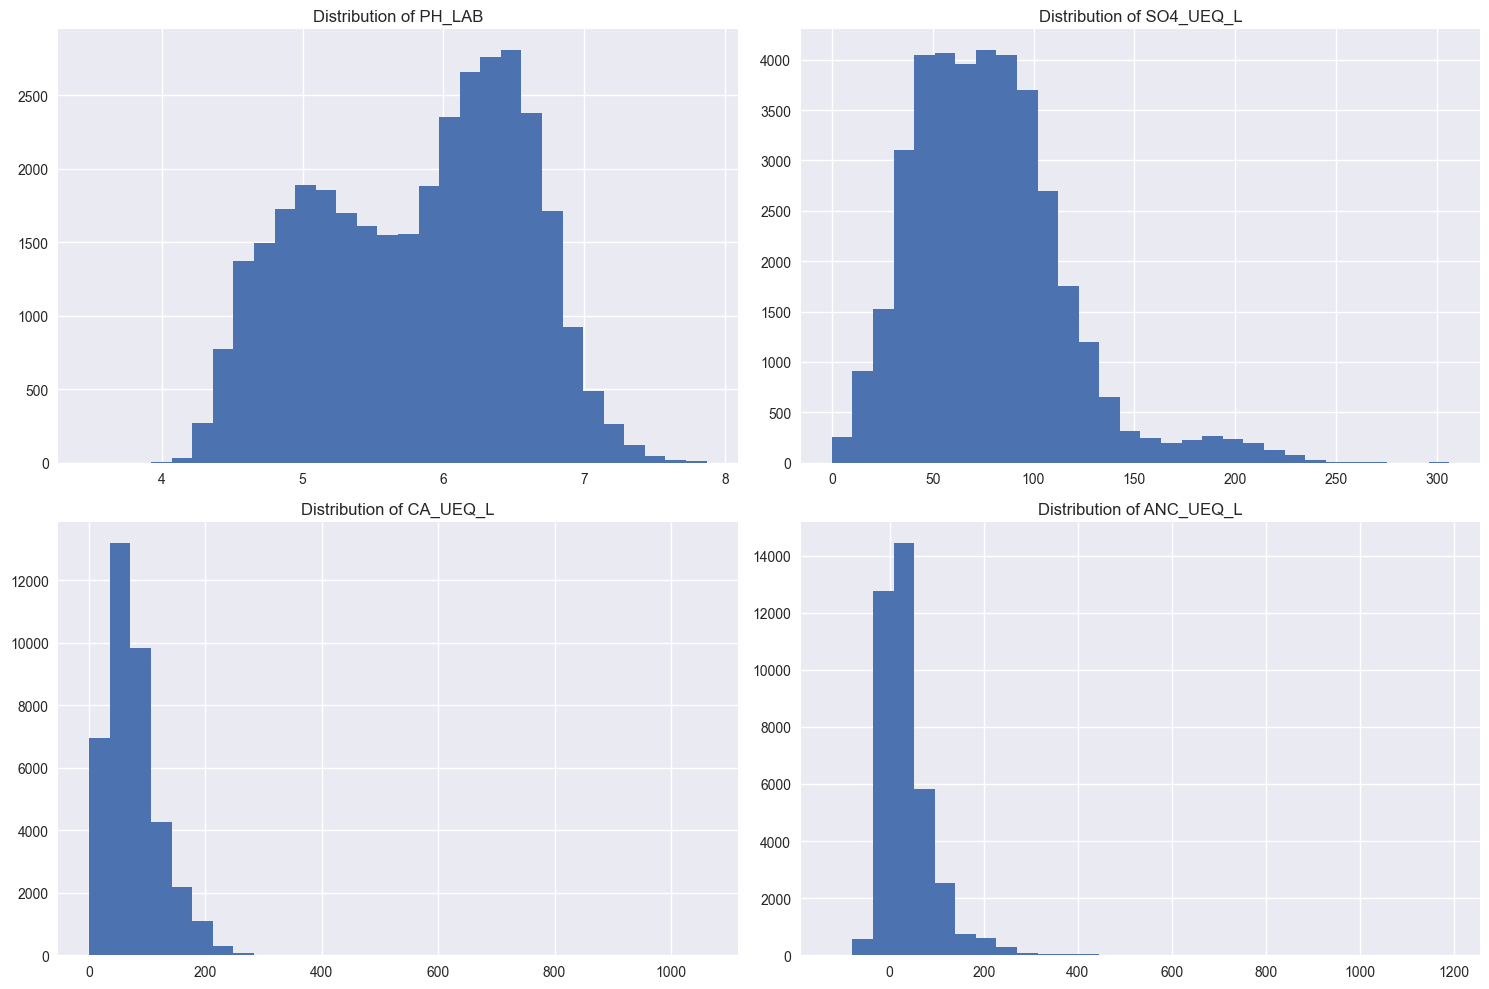

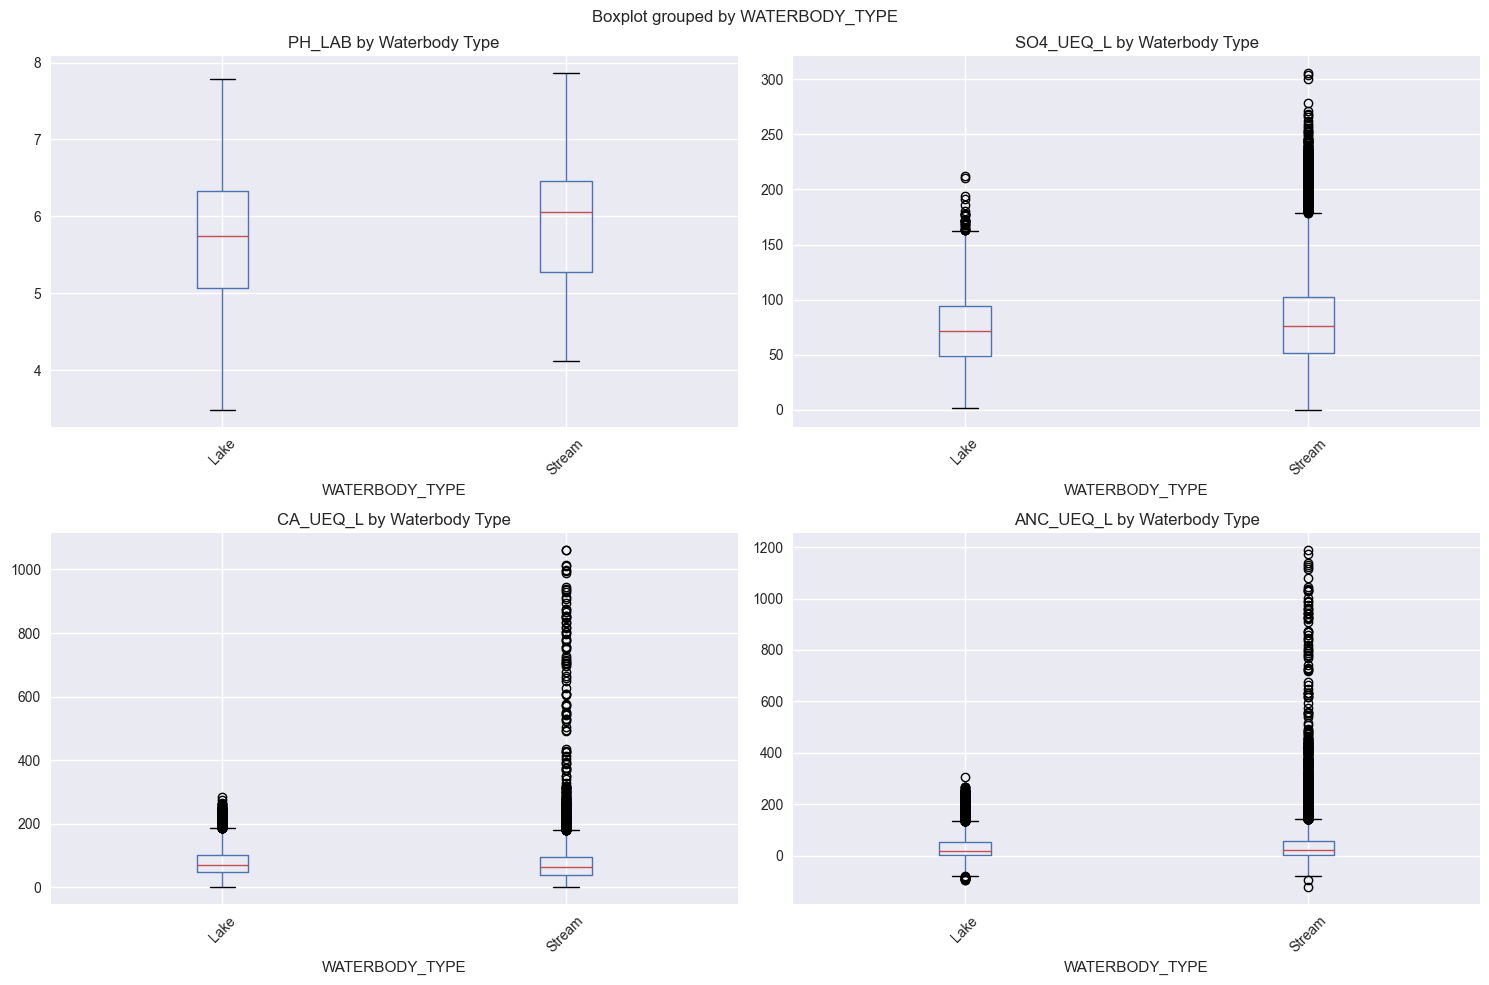

In [9]:
run_analysis(ltm_data, epa_catalog, epa_lt_monitoring)